# 判别分析实验报告

## 1.采用逻辑回归

In [5]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning  
import warnings  
  
# 忽略收敛警告和数据转换警告  
warnings.filterwarnings("ignore", category=ConvergenceWarning)  
warnings.filterwarnings("ignore", category=DataConversionWarning)  
  
# 读取数据  
data_train = pd.read_csv('/Users/a11/vscode/discriminance-analysis/byh/src/datasets/winequality-red_train.csv')  
data_test = pd.read_csv('/Users/a11/vscode/discriminance-analysis/byh/src/datasets/winequality-red_test.csv')  
  
# 分割输入和输出变量  
inputs_train = data_train.drop(columns='quality_two').values  
outputs_train = data_train['quality_two'].values.reshape(-1, 1)  # 确保输出是二维数组  
  
inputs_test = data_test.drop(columns='quality_two').values  
outputs_test = data_test['quality_two'].values.reshape(-1, 1)  # 确保输出是二维数组  
  
# 创建逻辑回归模型实例  
model = LogisticRegression()  
  
# 训练模型  
model.fit(inputs_train, outputs_train)  
  
# 预测  
y_pred = model.predict(inputs_test)  
  
# 计算准确率  
accuracy = accuracy_score(outputs_test, y_pred)  
print(f"Accuracy: {accuracy:.4f}")  
  
# 计算精确率、召回率和F1分数  
precision = precision_score(outputs_test, y_pred)  
recall = recall_score(outputs_test, y_pred)  
f1 = f1_score(outputs_test, y_pred)  
  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8656
Precision: 0.8783
Recall: 0.9780
F1 Score: 0.9255


In [4]:
import numpy as np  
import pandas as pd  
from sklearn.metrics import precision_score, recall_score, f1_score
  
# 读取数据  
data_train = pd.read_csv('/Users/a11/vscode/discriminance-analysis/byh/src/datasets/winequality-red_train.csv')  
data_test = pd.read_csv('/Users/a11/vscode/discriminance-analysis/byh/src/datasets/winequality-red_test.csv')  
  
# 分割输入和输出变量  
X_train = data_train.drop(columns='quality_two').values  
y_train = data_train['quality_two'].values  
  
X_test = data_test.drop(columns='quality_two').values  
y_test = data_test['quality_two'].values  
  
# 添加截距项  
X_train = np.insert(X_train, 0, 1, axis=1)  
X_test = np.insert(X_test, 0, 1, axis=1)  
  
# 初始化参数  
num_features = X_train.shape[1]  
theta = np.zeros(num_features)  
  
# 设置学习率和迭代次数  
learning_rate = 0.01  
iterations = 1000  
  
# 梯度下降算法  
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))  
  
def compute_cost(X, y, theta):  
    m = len(y)  
    predictions = sigmoid(np.dot(X, theta))  
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))  
    return cost  
  
def gradient_descent(X, y, theta, learning_rate, iterations):  
    m = len(y)  
    cost_history = np.zeros(iterations)  
    theta_history = np.zeros((iterations, len(theta)))  
      
    for it in range(iterations):  
        prediction = sigmoid(np.dot(X, theta))  
        error = prediction - y  
        gradient = (1 / m) * np.dot(X.T, error)  
        theta = theta - learning_rate * gradient  
        theta_history[it] = theta.T  
        cost_history[it] = compute_cost(X, y, theta)  
      
    return theta, cost_history, theta_history  
  
# 运行梯度下降算法  
theta, cost_history, theta_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)  
  
# 使用训练好的参数进行预测  
y_pred = sigmoid(np.dot(X_test, theta))  
y_pred_cls = (y_pred >= 0.5).astype(int)  # 因为逻辑回归输出的是概率，我们需要一个阈值来将其转换为类别  
  
# 计算准确率（仅适用于二分类问题）  
accuracy = np.sum(y_pred_cls == y_test) / len(y_test)  
print(f"Accuracy: {accuracy}")
# 确保y_test和y_pred_cls都是一维数组  
y_test = y_test.reshape(-1)  
y_pred_cls = y_pred_cls.reshape(-1)  
# 计算精确率、召回率和F1分数（适用于二分类或多分类问题）  
precision = precision_score(y_test, y_pred_cls)  
recall = recall_score(y_test, y_pred_cls)  
f1 = f1_score(y_test, y_pred_cls)  
  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

/var/folders/vs/5r7_tdq17mxc6yz5k8cs1p1c0000gn/T/ipykernel_13891/2587530254.py:35: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Accuracy: 0.853125
Precision: 0.8531
Recall: 1.0000
F1 Score: 0.9207


## 2.采用动量法的多层感知机

训练时，训练集和测试集的损失函数

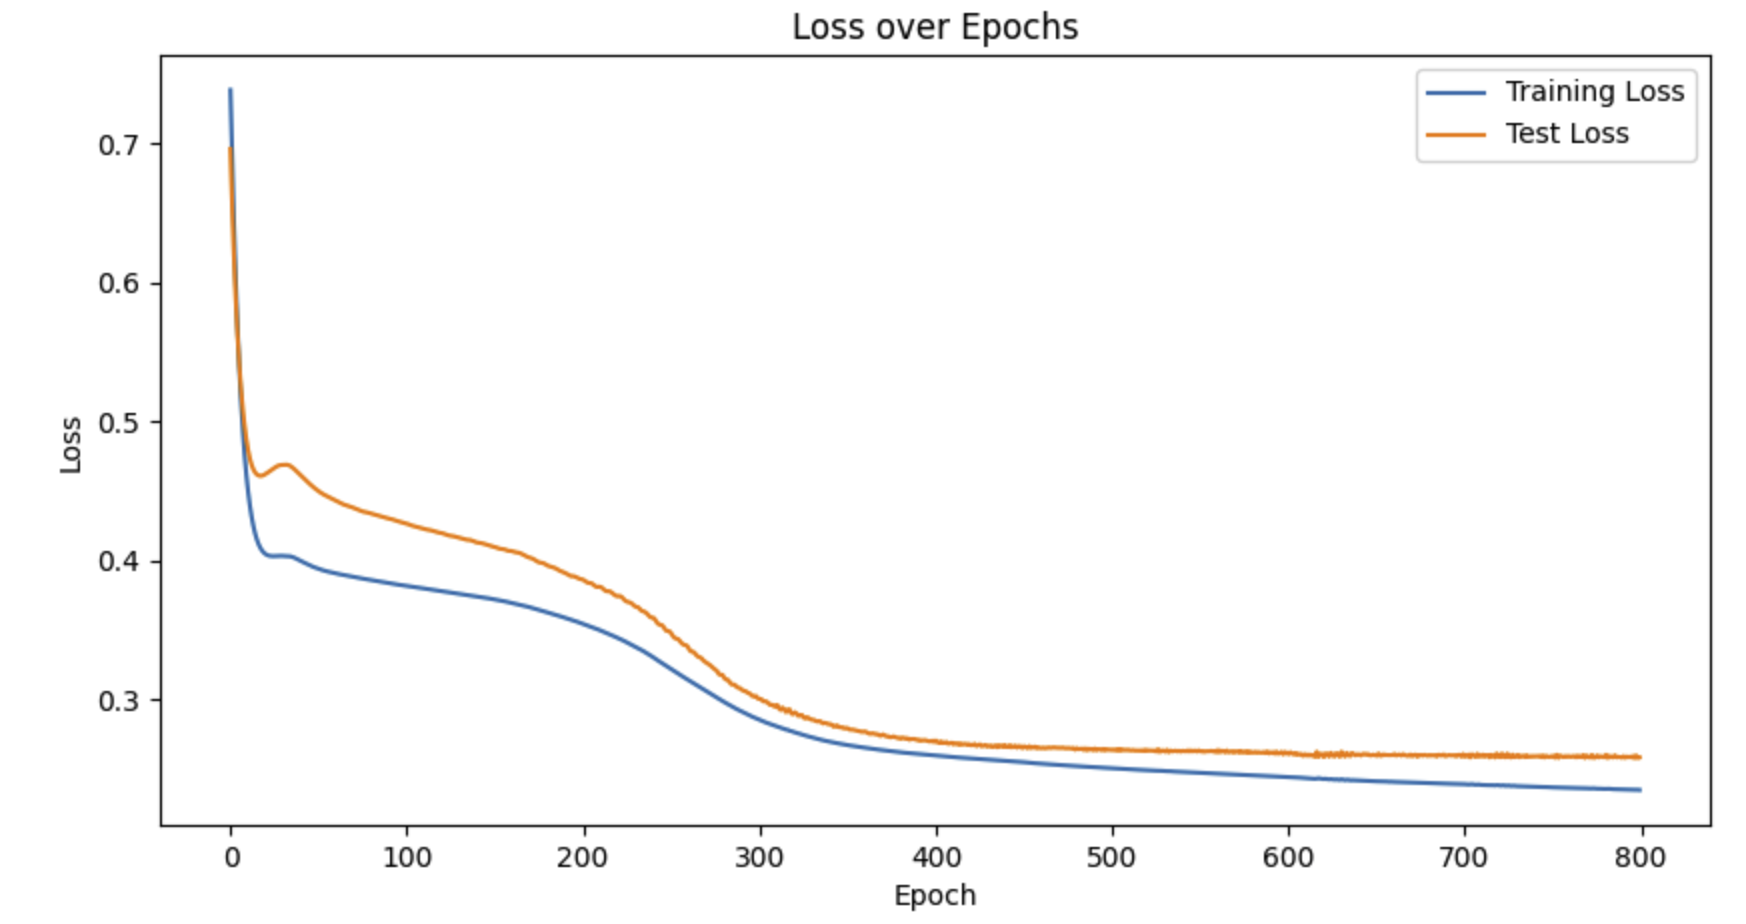

In [3]:
import torch

import pandas as pd
import torch.nn as nn
import torch.optim as optim


from src.models.Model import ClaModel
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

data = pd.read_csv('/Users/a11/vscode/discriminance-analysis/byh/src/datasets/winequality-red_test.csv')


device = torch.device("mps")

inputs= data.drop(columns='quality_two').values
outputs = data[["quality_two"]].values

inputs = torch.Tensor(inputs)
outputs = torch.Tensor(outputs)


model = ClaModel(11,32,1)

# 加载模型权重  
model_weights = torch.load("/Users/a11/vscode/discriminance-analysis/byh/checkpoint/Cla_model.pth")  
  
# 将加载的权重加载到模型实例中  
model.load_state_dict(model_weights) 
model.to(device)

model.eval()

# 将测试集转移到CPU设备上
test_inputs = inputs.to(device)
test_targets = outputs.to(device)

# 通过模型生成预测
predictions = model(test_inputs)


# 将预测转换为类别
predicted_classes = (predictions.squeeze() > 0.5).long()

# 计算准确率
num_correct = (predicted_classes == test_targets.squeeze()).sum().item()
num_total = test_targets.shape[0]
accuracy = num_correct/num_total
# 假设你的任务是二分类，且以0.5为阈值  
predicted_classes = (predictions.squeeze() > 0.5).long()  
  
# 将PyTorch张量转换为NumPy数组，以便与sklearn兼容  
true_classes = test_targets.squeeze().cpu().numpy()  
predicted_classes = predicted_classes.cpu().numpy()  
  
# 计算混淆矩阵  
cm = confusion_matrix(true_classes, predicted_classes)  
  
# 计算F1分数、准确率和召回率  
# 使用classification_report直接输出所有指标  
report = classification_report(true_classes, predicted_classes)  
  
# 或者单独计算F1分数、准确率和召回率  
precision = precision_score(true_classes, predicted_classes)  
recall = recall_score(true_classes, predicted_classes)  
f1 = f1_score(true_classes, predicted_classes)  
  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")  

print(f"Test Accuracy: {accuracy:.4f}")   #Test Accuracy：0.8719

Precision: 0.8973
Recall: 0.9597
F1 Score: 0.9274
Test Accuracy: 0.8719
